# Lecture 6: Quantum Arithmetic

### 6.1 The CX gate

The CX gate is two-qubit gate that perfroms a controlled-NOT operation. What does that mean, well it’s fairly simple:
- flips the target qubit (the second qubit) if and only if the control qubit
(the first qubit) is in the state |1⟩.
- it doesn’t flip target qubit (the second qubit) if and only if the control
qubit (the first qubit) is in the state |0⟩.

In [3]:
using Yao, YaoPlots


CX_gate_1 = chain(2, control(1, 2=>X),
                    Measure(2, locs=1:2))

nqubits: 2
chain
├─ control(1)
│  └─ (2,) X
└─ Measure(2;locs=(1, 2))

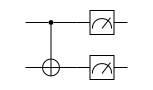

In [4]:
plot(CX_gate_1)

In [37]:
state_00 = ArrayReg(bit"00")
state_01 = ArrayReg(bit"01")
state_10 = ArrayReg(bit"10")
state_11 = ArrayReg(bit"11")

ArrayReg{2, ComplexF64, Array...}
    active qubits: 2/2
    nlevel: 2

The basis state |00⟩ represents both qubits being in the state |0⟩. In the case of a two-qubit system, it can be written as:

|00⟩ = 1.0 * |0⟩ ⊗ 1.0 * |0⟩

In [35]:
state(state_00)

4×1 Matrix{ComplexF64}:
 1.0 + 0.0im
 0.0 + 0.0im
 0.0 + 0.0im
 0.0 + 0.0im

In [19]:
state(state_01)

4×1 Matrix{ComplexF64}:
 0.0 + 0.0im
 1.0 + 0.0im
 0.0 + 0.0im
 0.0 + 0.0im

In [20]:
state(state_10)

4×1 Matrix{ComplexF64}:
 0.0 + 0.0im
 0.0 + 0.0im
 1.0 + 0.0im
 0.0 + 0.0im

In [38]:
state(state_11)

4×1 Matrix{ComplexF64}:
 0.0 + 0.0im
 0.0 + 0.0im
 0.0 + 0.0im
 1.0 + 0.0im

We expect state_00 to remain unchaged because the control qubit is 0.

In [42]:
apply!(state_00, CX_gate_1)

ArrayReg{2, ComplexF64, Array...}
    active qubits: 2/2
    nlevel: 2

In [43]:
state(state_00)

4×1 Matrix{ComplexF64}:
 1.0 + 0.0im
 0.0 + 0.0im
 0.0 + 0.0im
 0.0 + 0.0im

We expect state_01 to move to state_11 because the control qubit is 1

In [44]:
apply!(state_01, CX_gate_1)

ArrayReg{2, ComplexF64, Array...}
    active qubits: 2/2
    nlevel: 2

In [45]:
state(state_01)

4×1 Matrix{ComplexF64}:
 0.0 + 0.0im
 0.0 + 0.0im
 0.0 + 0.0im
 1.0 + 0.0im

We expect state_10 to remain unchaged because the control qubit is 0.

In [46]:
apply!(state_10, CX_gate_1)

ArrayReg{2, ComplexF64, Array...}
    active qubits: 2/2
    nlevel: 2

In [47]:
state(state_10)

4×1 Matrix{ComplexF64}:
 0.0 + 0.0im
 0.0 + 0.0im
 1.0 + 0.0im
 0.0 + 0.0im

We expect state_11 to move to state_01 because the control qubit is 1

In [40]:
apply!(state_11, CX_gate_1)

ArrayReg{2, ComplexF64, Array...}
    active qubits: 2/2
    nlevel: 2

In [41]:
state(state_11)

4×1 Matrix{ComplexF64}:
 0.0 + 0.0im
 1.0 + 0.0im
 0.0 + 0.0im
 0.0 + 0.0im

### 6.2 The Toffoli Gate

The Toffoli gate = three-qubit and it also perfroms a controlled-controlled-NOT operation. What does that mean, well it’s fairly simple:

- flips the target qubit (the third qubit) if and only if both the control
qubits (the first qubit and second qubit) are in the state |1⟩.
- it doesn’t flip target qubit (the third qubit) if the first control qubit is
in the state |0⟩ and the second control qubit is in state |1⟩.
- it doesn’t flip target qubit (the third qubit) if the first control qubit is
in the state |1⟩ and the second control qubit is in state |0⟩.
- it doesn’t flip target qubit (the third qubit) if the first control qubit is
in the state |0⟩ and the second control qubit is in state |0⟩.

In [90]:
using Yao, YaoPlots


Toffoli_gate_1 = chain(3, control(1:2, 3=>X),
                    Measure(3, locs=1:3))

nqubits: 3
chain
├─ control(1, 2)
│  └─ (3,) X
└─ Measure(3;locs=(1, 2, 3))

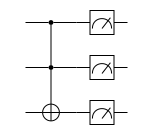

In [89]:
plot(Toffoli_gate_1)

In [54]:
state_000 = ArrayReg(bit"00")
state_011 = ArrayReg(bit"01")
state_110 = ArrayReg(bit"11")

ArrayReg{2, ComplexF64, Array...}
    active qubits: 2/2
    nlevel: 2

We are going to apply the gate on 000

In [77]:
state000 = zero_state(3)

state(state000)

8×1 Matrix{ComplexF64}:
 1.0 + 0.0im
 0.0 + 0.0im
 0.0 + 0.0im
 0.0 + 0.0im
 0.0 + 0.0im
 0.0 + 0.0im
 0.0 + 0.0im
 0.0 + 0.0im

We are going to put the 000 state through the gate and nothing should change.

In [83]:
apply!(state000, Toffoli_gate_1)

ArrayReg{2, ComplexF64, Array...}
    active qubits: 3/3
    nlevel: 2

In [102]:
state(state000)

8×1 Matrix{ComplexF64}:
 1.0 + 0.0im
 0.0 + 0.0im
 0.0 + 0.0im
 0.0 + 0.0im
 0.0 + 0.0im
 0.0 + 0.0im
 0.0 + 0.0im
 0.0 + 0.0im

We are going to transform the 000 state into a 011 state and put through the gate, we should have 111 state.

In [117]:
using Yao , YaoPlots

circuit_011 = chain(3, 
put(2=>X),
put(3=>X)
)

nqubits: 3
chain
├─ put on (2)
│  └─ X
└─ put on (3)
   └─ X


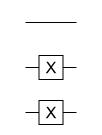

In [118]:
plot(circuit_011)

In [119]:
apply!(state000, circuit_011)
state(state000)

8×1 Matrix{ComplexF64}:
 0.0 + 0.0im
 0.0 + 0.0im
 0.0 + 0.0im
 1.0 + 0.0im
 0.0 + 0.0im
 0.0 + 0.0im
 0.0 + 0.0im
 0.0 + 0.0im

In [120]:
apply!(state000, Toffoli_gate_1)

ArrayReg{2, ComplexF64, Array...}
    active qubits: 3/3
    nlevel: 2

In [121]:
state(state000)

8×1 Matrix{ComplexF64}:
 0.0 + 0.0im
 0.0 + 0.0im
 0.0 + 0.0im
 0.0 + 0.0im
 0.0 + 0.0im
 0.0 + 0.0im
 0.0 + 0.0im
 1.0 + 0.0im

In [115]:
using Yao , YaoPlots

circuit_111 = chain(3, 
put(1=>X),
put(2=>X),
put(3=>X)  
)

nqubits: 3
chain
├─ put on (1)
│  └─ X
├─ put on (2)
│  └─ X
└─ put on (3)
   └─ X


In [116]:
measure.([(ArrayReg(bit"000") |> Toffoli_gate_1) 
(ArrayReg(bit"001") |> Toffoli_gate_1) 
(ArrayReg(bit"010") |> Toffoli_gate_1) 
(ArrayReg(bit"011") |> Toffoli_gate_1) 
(ArrayReg(bit"110") |> Toffoli_gate_1) 
(ArrayReg(bit"101") |> Toffoli_gate_1) 
(ArrayReg(bit"100") |> Toffoli_gate_1) 
(ArrayReg(bit"111") |> Toffoli_gate_1)])

8-element Vector{Vector{DitStr{2, 3, Int64}}}:
 [000 ₍₂₎]
 [001 ₍₂₎]
 [010 ₍₂₎]
 [111 ₍₂₎]
 [110 ₍₂₎]
 [101 ₍₂₎]
 [100 ₍₂₎]
 [011 ₍₂₎]

### 6.3 Adder circuit

- q1 and q0 are the 2 qubits on which the addition is perform
- q2 is the carry-in from a possible previous addition
- q3 is needed in order to obtain a carry-out

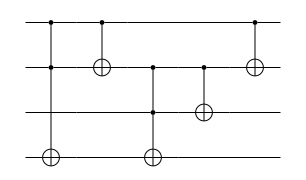

In [62]:
using Yao , YaoPlots
adder = chain(4 ,
control( 1 : 2 , 4=>X) ,
control( 1 , 2=>X) ,
control( 2 : 3 , 4=>X) ,
control( 2 , 3=>X) ,
control( 1 , 2=>X));
plot(adder)

Using this adder as a building block you could be able to create adders
for many more qubits by using carry-out for the first pair, becomes the
carry in for the a subsequent pair.

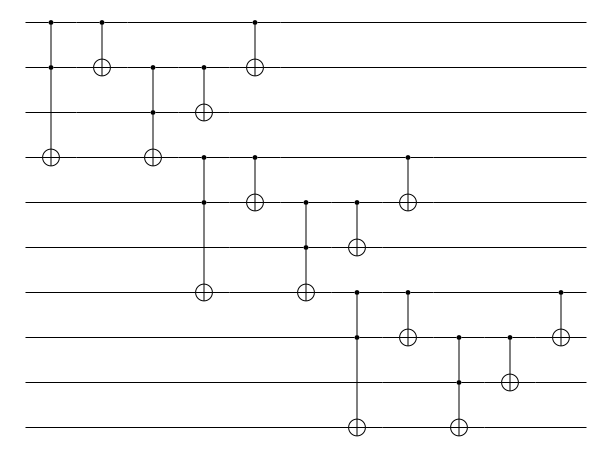

In [122]:
multi_cell_adder = chain(10, 
    put(1:4=>adder), 
    put(4:7=>adder), 
    put(7:10=>adder))
plot(multi_cell_adder)

We first create 2 numbers we want to add.

In [135]:
a = ArrayReg(bit"111") #7
b = ArrayReg(bit"001") #1

ArrayReg{2, ComplexF64, Array...}
    active qubits: 3/3
    nlevel: 2

We join them in a 4 qubit state string and reorder the bits to feed them into our adder

In [136]:
input = join(zero_state(4), a, b)

reorder!(input, [2 5 8 3 6 9 1 4 7 10])

ArrayReg{2, ComplexF64, Array...}
    active qubits: 10/10
    nlevel: 2

After that we feed the numbers to the adder and measure the outcome, I'm gonna only measure it once but it should be done hundreds of times.

In [137]:
results = input |> multi_cell_adder |> r->measure(r, nshots=1)

1-element Vector{DitStr{2, 10, Int64}}:
 1001001010 ₍₂₎

We simply convert the outcome into a string.

In [138]:
string_output = reverse(string(Int(results[1]), base=2, pad=10))

"0101001001"

Our number is made out of the sum bits of the adder cells:
- the 1st bit comes from the 3rd output of the first adder cell, so it's the 3rd element of the string
- the 2nd bit comes from the 3rd output of the second adder cell, so it's the 6th bit of the string
- the 3rd bit comes from the 3rd output of the third adder cell, so it's the 9th bit of the string
- the 4th bit is the final carray-out bit so it's the 4th bit of the 3rd adder cell, so it's the 10th bit of the string

In [139]:
full_output = parse(Int64, reverse(string_output[3] * string_output[6] * string_output[9] * string_output[10]), base=2)

8

### 6.3 Subtractor circuit

- q1 and q0 are the 2 qubits on which the subtraction is performed
- q2 is the borrow-in from a possible previous addition
- q3 is needed in order to obtain a borrow-out

In order to simulate the borrowing we will use an X Gate

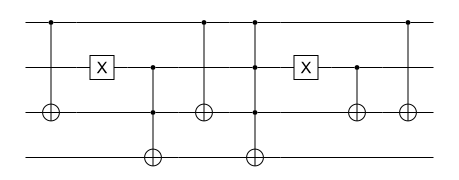

In [141]:
using Yao , YaoPlots

sub = chain(4,
    control(1, 3=>X),
    put(2=>X),
    control(2:3, 4=>X),
    control(1, 3=>X),
    control(1:3, 4=>X),
    put(2=>X),
    control(2, 3=>X),
    control(1, 3=>X)
);
plot(sub)

In [142]:
mess = chain(4,
    Measure(4, locs=1:4))

nqubits: 4
chain
└─ Measure(4;locs=(1, 2, 3, 4))

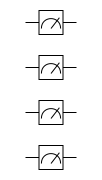

In [143]:
plot(mess)

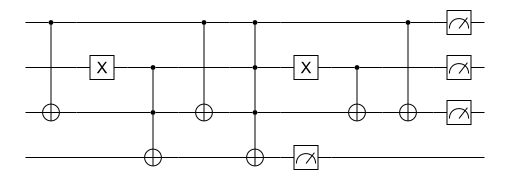

In [144]:
sub_mess = chain(4, 
    put(1:4 => sub),
    put(1:4 => mess)
)
plot(sub_mess)